# Decision trees
### Pros:

1.  **Simple and Interpretable**: Easy to understand and visualize.
2.  **Non-Parametric**: Makes no assumptions about the underlying data distribution.
3.  **Handles Both Classification and Regression**: Versatile for various tasks.
4.  **Captures Non-Linear Relationships**: Can model complex decision boundaries.
5.  **Robust to Irrelevant Features**: Automatically selects important features.

### Cons:

1.  **Prone to Overfitting**: Can create overly complex trees that do not generalize well.
2.  **Sensitive to Small Variations in Data**: Minor changes can lead to different tree structures.
3.  **Biased with Imbalanced Data**: Needs techniques like class weighting or balancing.
4.  **No Probabilistic Output**: Provides hard class labels without confidence estimates.

In [3]:
#Imports
import mglearn
import graphviz

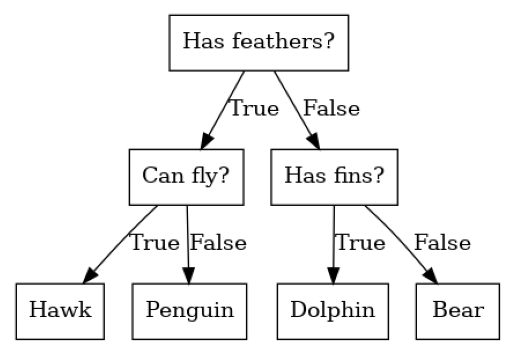

In [4]:
# Plot the animal tree as examplified in the book
mglearn.plots.plot_animal_tree()

#### Building trees for the Breast Cancer dataset dataset

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. Here we set max_depth=4, meaning only four consecutive questions can be asked Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set

In [6]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

Accuracy on training set: 0.988
Accuracy on test set: 0.951


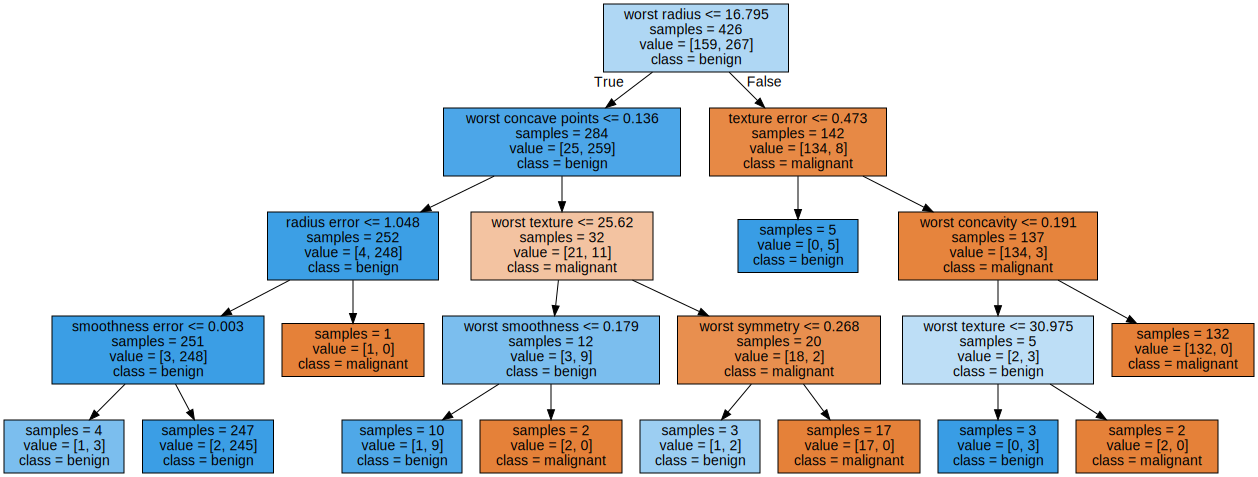

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

#### Feature importance
It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1

In [10]:
#prints the feature importances
print(f"Feature importances:\n{tree.feature_importances_}")

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


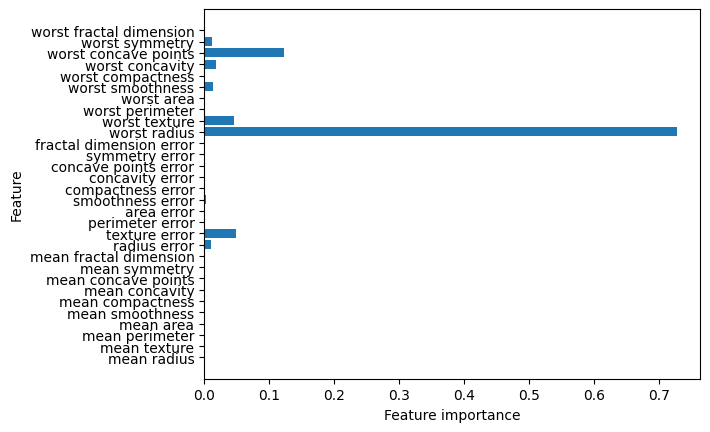

In [11]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

#### Decision trees for regression

Text(0, 0.5, 'Price in $/Mbyte')

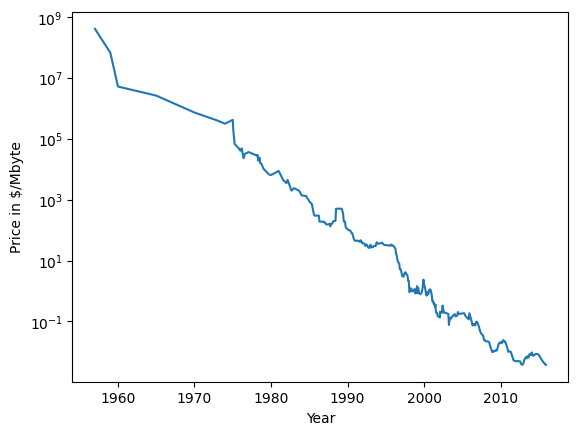

In [13]:
import pandas as pd
ram_prices = pd.read_csv(r"/home/klaus/Repositories/Machine-Learning-Examples/Data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

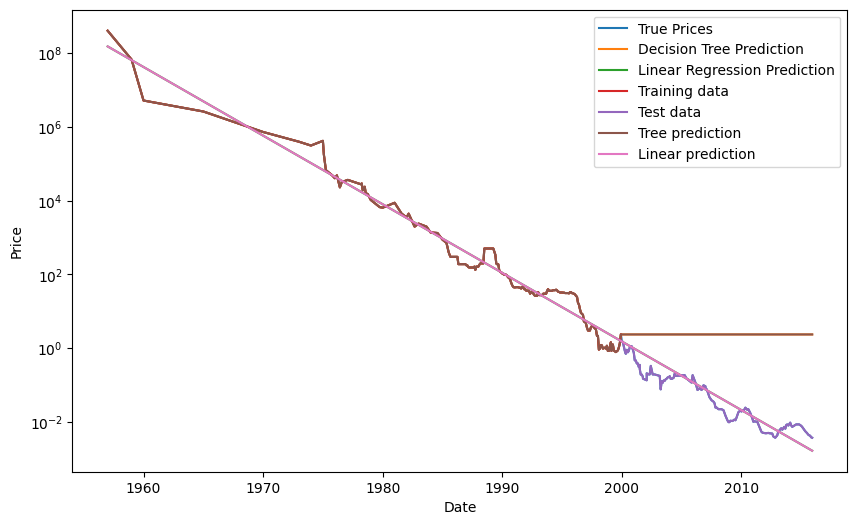

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# Convert the 'date' column to a NumPy array and reshape it to 2D
X_train = data_train.date.values.reshape(-1, 1)
y_train = np.log(data_train.price.values)  # Ensure target values are also NumPy arrays

# Train the models
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# Predict on all data
X_all = ram_prices.date.values.reshape(-1, 1)
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# Undo the log-transform to get the original scale
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

# Optional: Plotting the results (if you want to visualize it)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ram_prices.date, ram_prices.price, label="True Prices")
plt.plot(ram_prices.date, price_tree, label="Decision Tree Prediction")
plt.plot(ram_prices.date, price_lr, label="Linear Regression Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.show()
